# Linear Regression on FanDuel NFL 2014 Season

###1. Create data frame which includes all statistics througout the 17 weeks

###2. Create linear regression formulas and graphs

###3. Draw conclusions

In [79]:
# imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import pylab

# this allows plots to appear directly in the notebook
%matplotlib inline
# increase size of plots
pylab.rcParams['figure.figsize'] = (15, 10)

###All weeks initialized, first.

In [18]:
wk1 = pd.read_csv("../data/fanduel_data/fanduel2014week1.csv",delimiter=";")
wk2 = pd.read_csv("../data/fanduel_data/fanduel2014week2.csv",delimiter=";")
wk3 = pd.read_csv("../data/fanduel_data/fanduel2014week3.csv",delimiter=";")
wk4 = pd.read_csv("../data/fanduel_data/fanduel2014week4.csv",delimiter=";")
wk5 = pd.read_csv("../data/fanduel_data/fanduel2014week5.csv",delimiter=";")
wk6 = pd.read_csv("../data/fanduel_data/fanduel2014week6.csv",delimiter=";")
wk7 = pd.read_csv("../data/fanduel_data/fanduel2014week7.csv",delimiter=";")
wk8 = pd.read_csv("../data/fanduel_data/fanduel2014week8.csv",delimiter=";")
wk9 = pd.read_csv("../data/fanduel_data/fanduel2014week9.csv",delimiter=";")
wk10 = pd.read_csv("../data/fanduel_data/fanduel2014week10.csv",delimiter=";")
wk11 = pd.read_csv("../data/fanduel_data/fanduel2014week11.csv",delimiter=";")
wk12 = pd.read_csv("../data/fanduel_data/fanduel2014week12.csv",delimiter=";")
wk13 = pd.read_csv("../data/fanduel_data/fanduel2014week13.csv",delimiter=";")
wk14 = pd.read_csv("../data/fanduel_data/fanduel2014week14.csv",delimiter=";")
wk15 = pd.read_csv("../data/fanduel_data/fanduel2014week15.csv",delimiter=";")
wk16 = pd.read_csv("../data/fanduel_data/fanduel2014week16.csv",delimiter=";")
wk17 = pd.read_csv("../data/fanduel_data/fanduel2014week17.csv",delimiter=";")

###Merge all weeks together

In [19]:
fanDuel2014Stats = wk1.append(wk2).append(wk3).append(wk4).append(wk5).append(wk6).append(wk7).append(wk8).append(wk9).append(wk10).append(wk11).append(wk12).append(wk13).append(wk14).append(wk15).append(wk16).append(wk17)
fanDuel2014Stats

,Week,Year,GID,Name,Pos,Team,h/a,Oppt,FD points,FD salary
0,1,2014,1301,"Ryan, Matt",QB,atl,h,nor,31.42,8100
1,1,2014,1340,"Stafford, Matthew",QB,det,h,nyg,30.04,9300
2,1,2014,1409,"Luck, Andrew",QB,ind,a,den,28.70,9200
3,1,2014,1081,"Manning, Peyton",QB,den,h,ind,22.46,10200
4,1,2014,1207,"Palmer, Carson",QB,ari,h,sdg,21.06,6900
5,1,2014,1382,"Locker, Jake",QB,ten,a,kan,20.04,6600
6,1,2014,1263,"Cutler, Jay",QB,chi,h,buf,19.96,8000
7,1,2014,1412,"Wilson, Russell",QB,sea,h,gnb,18.54,8100
8,1,2014,1232,"Roethlisberger, Ben",QB,pit,h,cle,18.40,7800
9,1,2014,1403,"Dalton, Andy",QB,cin,a,bal,18.34,7800


In [20]:
fanDuel2014Stats.shape

(7340, 10)

That's a lot of data points. Hopefully this season tells us something!

###Let's pick out a person, Geno Smith

In [21]:
fanDuel2014Stats[fanDuel2014Stats['Name']=="Smith, Geno"]


,Week,Year,GID,Name,Pos,Team,h/a,Oppt,FD points,FD salary
21,1,2014,1426,"Smith, Geno",QB,nyj,h,oak,13.64,7000
7,2,2014,1426,"Smith, Geno",QB,nyj,a,gnb,18.64,6900
16,3,2014,1426,"Smith, Geno",QB,nyj,h,chi,16.64,7400
21,4,2014,1426,"Smith, Geno",QB,nyj,h,det,9.76,7400
33,5,2014,1426,"Smith, Geno",QB,nyj,a,sdg,0.38,7100
19,6,2014,1426,"Smith, Geno",QB,nyj,h,den,15.70,6900
13,7,2014,1426,"Smith, Geno",QB,nyj,a,nwe,16.74,6900
37,8,2014,1426,"Smith, Geno",QB,nyj,h,buf,-2.80,7000
28,12,2014,1426,"Smith, Geno",QB,nyj,a,buf,3.96,5000
33,13,2014,1426,"Smith, Geno",QB,nyj,h,mia,3.50,5000


Looks like he missed out on a few weeks. Okay, we'll start on linear regression now.

Beginning with some column renaming for functional programmatic purposes.

In [24]:
'''
fanDuel2014Stats['homeaway'] = fanDuel2014Stats['h/a']
fanDuel2014Stats['FDpoints'] = fanDuel2014Stats['FD points']
fanDuel2014Stats['FDsalary'] = fanDuel2014Stats['FD salary']
fanDuel2014Stats = fanDuel2014Stats.drop('h/a',1)
fanDuel2014Stats = fanDuel2014Stats.drop('FD points',1)
fanDuel2014Stats = fanDuel2014Stats.drop('FD salary',1)
'''
fanDuel2014Stats

,Week,Year,GID,Name,Pos,Team,Oppt,homeaway,FDpoints,FDsalary
0,1,2014,1301,"Ryan, Matt",QB,atl,nor,h,31.42,8100
1,1,2014,1340,"Stafford, Matthew",QB,det,nyg,h,30.04,9300
2,1,2014,1409,"Luck, Andrew",QB,ind,den,a,28.70,9200
3,1,2014,1081,"Manning, Peyton",QB,den,ind,h,22.46,10200
4,1,2014,1207,"Palmer, Carson",QB,ari,sdg,h,21.06,6900
5,1,2014,1382,"Locker, Jake",QB,ten,kan,a,20.04,6600
6,1,2014,1263,"Cutler, Jay",QB,chi,buf,h,19.96,8000
7,1,2014,1412,"Wilson, Russell",QB,sea,gnb,h,18.54,8100
8,1,2014,1232,"Roethlisberger, Ben",QB,pit,cle,h,18.40,7800
9,1,2014,1403,"Dalton, Andy",QB,cin,bal,a,18.34,7800


###Now we have column names we can use in inline functions
## Plotting!!
#####Using Seaborn.
Plot data and a linear regression model fit.

#Points based on Salary

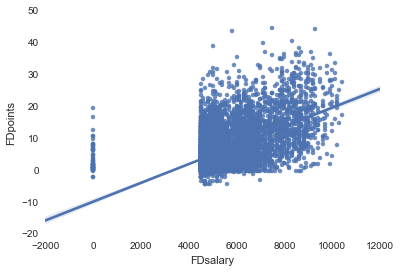

In [43]:
sns.regplot(x='FDsalary',y='FDpoints',data=fanDuel2014Stats)

###Regression line parameters

In [61]:
seasonRegLine = smf.ols(formula='FDpoints ~ FDsalary',data=fanDuel2014Stats).fit()
seasonRegLine.params

Intercept   -9.617453
FDsalary     0.002949
dtype: float64

#Points based on being Home or Away

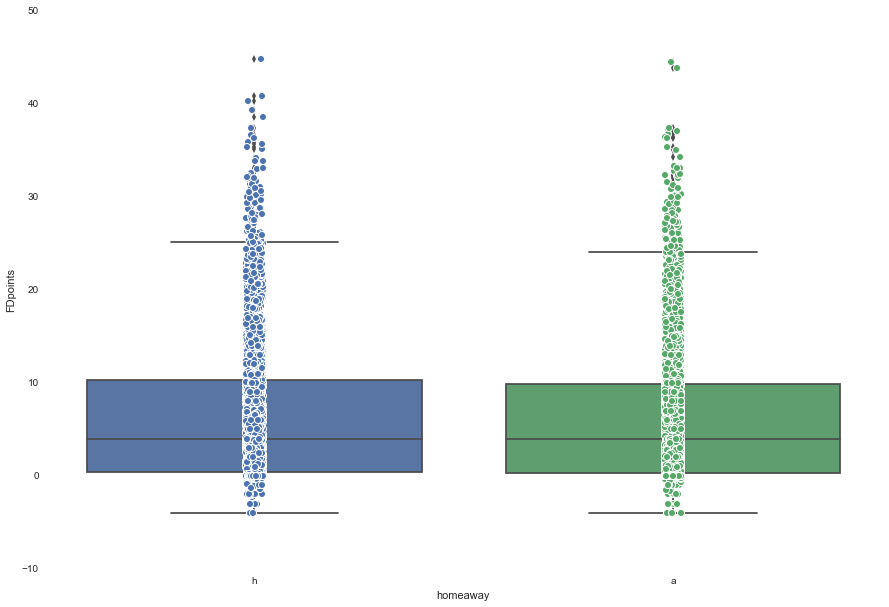

In [80]:
vsHomeAway = sns.stripplot(x='homeaway',y='FDpoints',data=fanDuel2014Stats,jitter=.02)
vsHomeAway = sns.boxplot(x="homeaway", y="FDpoints", data=fanDuel2014Stats)

###We'll look at the progression over the weeks.

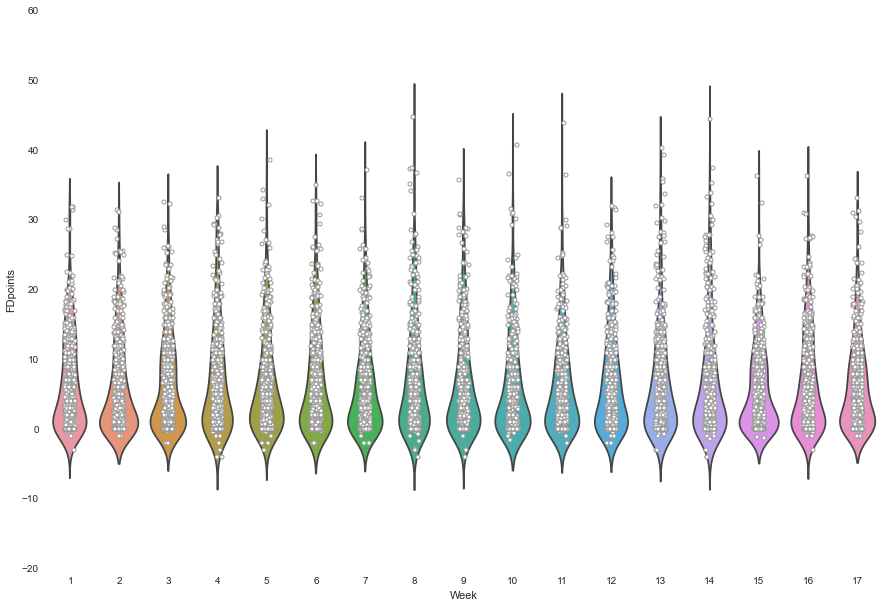

In [89]:
vsHomeAway = sns.stripplot(x='Week',y='FDpoints',data=fanDuel2014Stats,jitter=True,size=4,color='white',edgecolor='gray')
vsHomeAway = sns.violinplot(x="Week", y="FDpoints", data=fanDuel2014Stats,inner=None)

In [62]:
fanDuel2014Stats[fanDuel2014Stats['FDsalary']==0]

,Week,Year,GID,Name,Pos,Team,Oppt,homeaway,FDpoints,FDsalary
85,1,2014,2878,"Lane, Jorvorskie",RB,tam,car,h,5.40,0
229,1,2014,3586,"Holmes, Santonio",WR,chi,buf,h,3.10,0
111,2,2014,2979,"Johnson, Austin",RB,nor,cle,a,1.00,0
256,2,2014,5362,"Brown, Philly",WR,car,det,h,1.10,0
91,3,2014,2794,"Thomas, Daniel",RB,mia,kan,h,4.10,0
115,3,2014,2982,"Oliver, Branden",RB,sdg,buf,a,1.10,0
132,3,2014,2979,"Johnson, Austin",RB,nor,min,h,0.20,0
365,3,2014,4474,"Brock, Kevin",TE,cin,ten,h,0.20,0
73,4,2014,2794,"Thomas, Daniel",RB,mia,oak,a,6.50,0
107,4,2014,2979,"Johnson, Austin",RB,nor,dal,a,0.20,0


#####There are outliers we gotta take out where FDsalary = 0

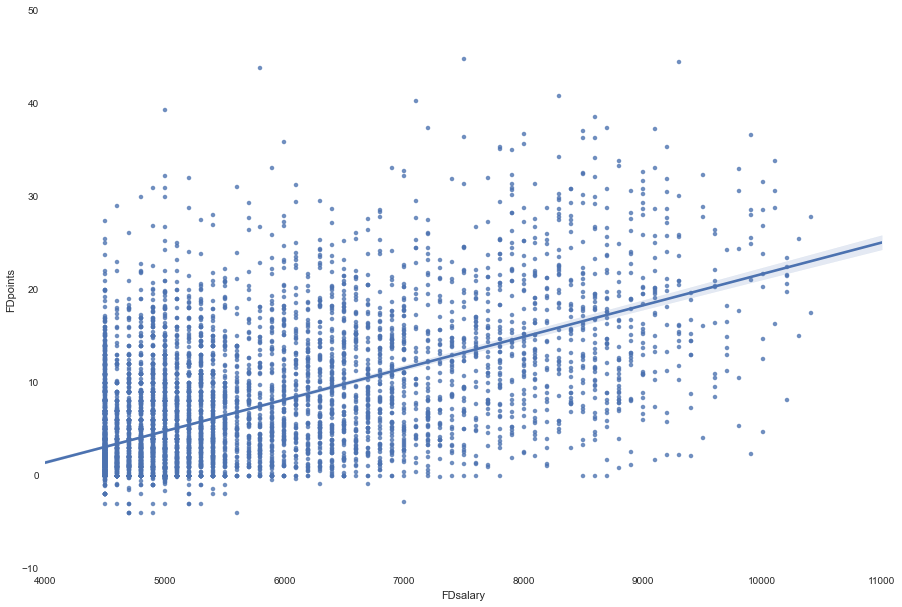

In [83]:
fanDuel2014Stats = fanDuel2014Stats[fanDuel2014Stats['FDsalary'] != 0]
sns.regplot(x='FDsalary',y='FDpoints',data=fanDuel2014Stats)

In [65]:
seasonRegLine = smf.ols(formula='FDpoints ~ FDsalary',data=fanDuel2014Stats).fit()
seasonRegLine.params

Intercept   -12.115108
FDsalary      0.003383
dtype: float64

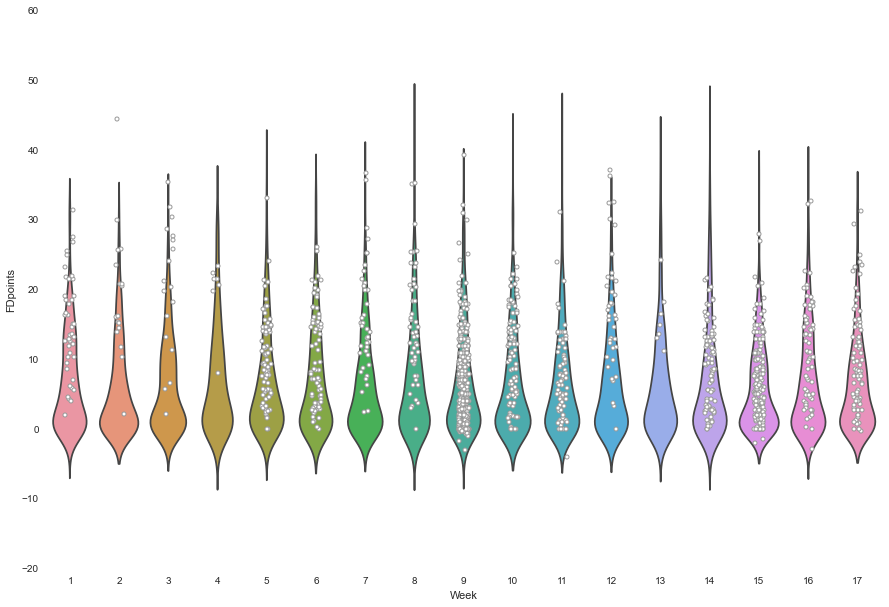

In [84]:
vsHomeAway = sns.stripplot(x='FDsalary',y='FDpoints',data=fanDuel2014Stats,jitter=True,size=4,color='white',edgecolor='gray')
vsHomeAway = sns.violinplot(x="Week", y="FDpoints", data=fanDuel2014Stats,inner=None)

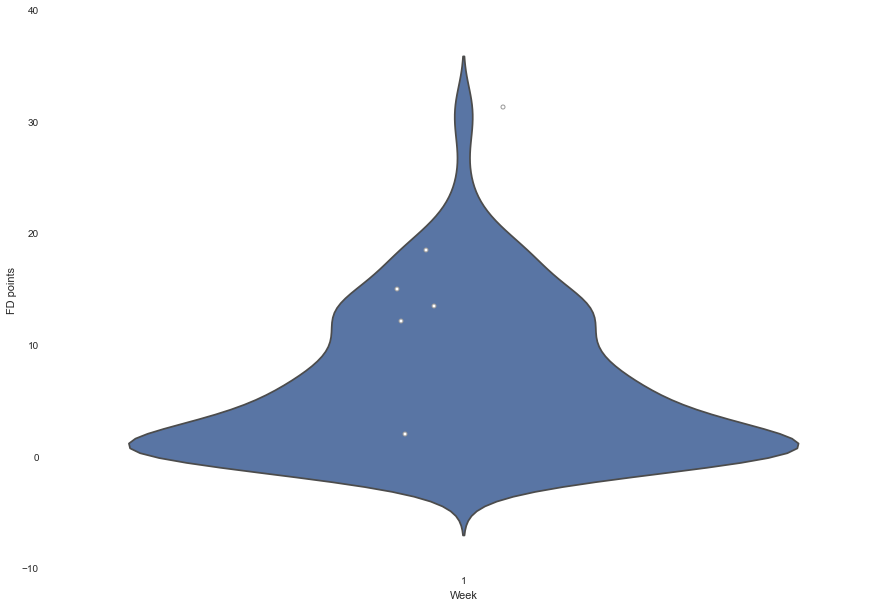

In [88]:
# distribution in one week

wk1Dist = sns.stripplot(x='FD salary',y='FD points',data=wk1,jitter=True,size=4,color='white',edgecolor='gray')
wk1Dist = sns.violinplot(x="Week", y="FD points", data=wk1,inner=None)

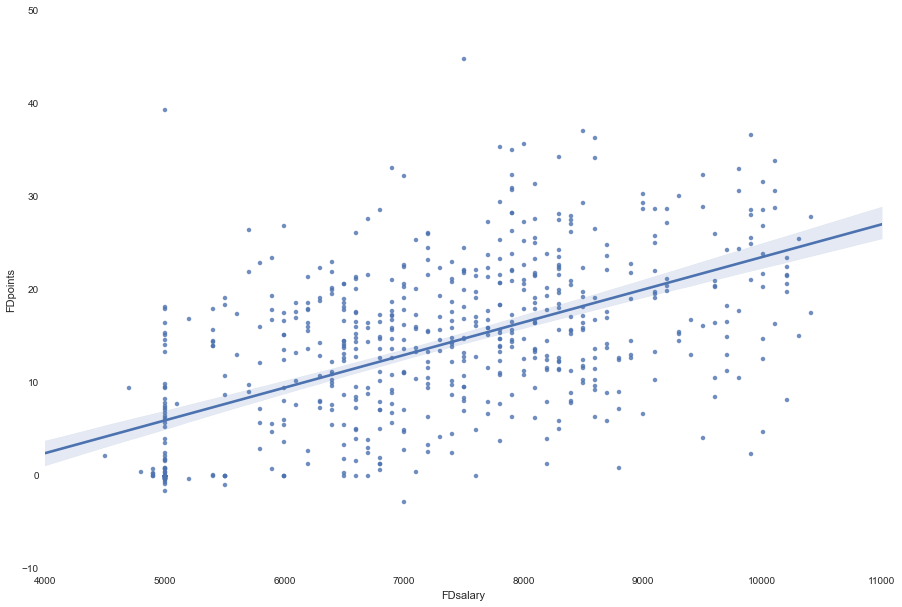

In [91]:
quarterbacks = fanDuel2014Stats[fanDuel2014Stats['Pos']=='QB']

sns.regplot(x='FDsalary',y='FDpoints',data=quarterbacks)